# 음성의 spectral_flux를 관찰하는 프로그램
좋은 feature 인듯

In [11]:
import pandas as pd
from IPython.display import Audio, display
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [12]:
seed = 42
# seed = 123
# seed = 9903
train_file = "train.csv"
test_file = "test.csv"

In [13]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


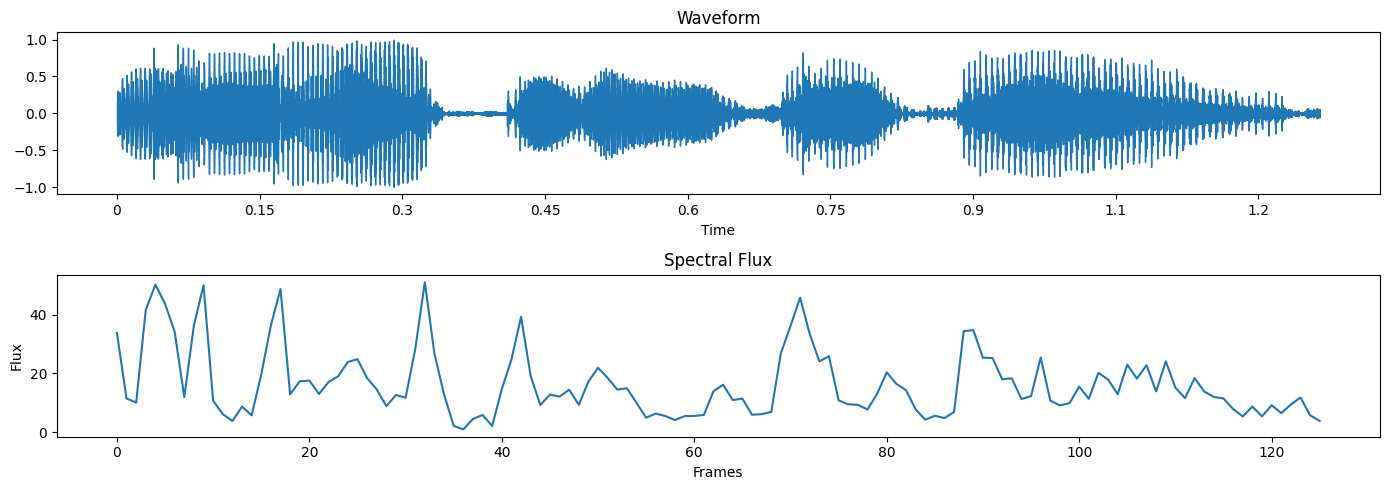

In [14]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 오디오 파일 로드
filename = './train/JFAWUOGJ.ogg'
y, sr = librosa.load(filename)

# n_fft와 hop_length 설정
frame_size_ms = 25  # 프레임 크기를 25ms로 설정
hop_size_ms = 10    # 홉 크기를 10ms로 설정

n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

# STFT 계산
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

# Spectral Flux 계산
spectral_flux = np.sqrt(np.sum(np.diff(S, axis=1)**2, axis=0))

# 시각화
plt.figure(figsize=(14, 5))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')

plt.subplot(2, 1, 2)
plt.plot(spectral_flux)
plt.title('Spectral Flux')
plt.xlabel('Frames')
plt.ylabel('Flux')

plt.tight_layout()
plt.show()

In [15]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

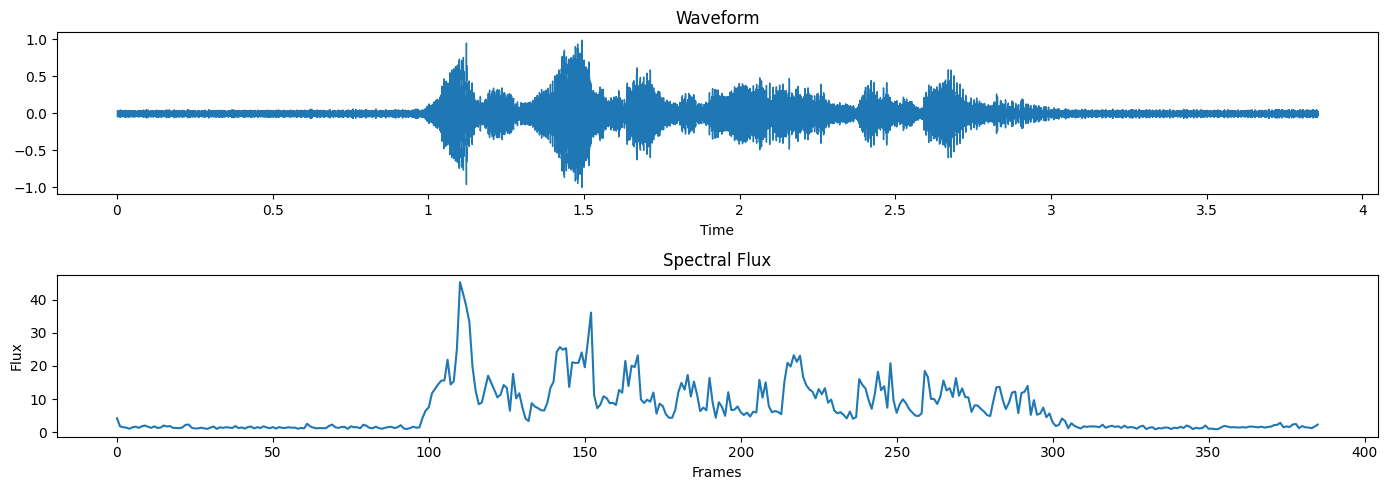

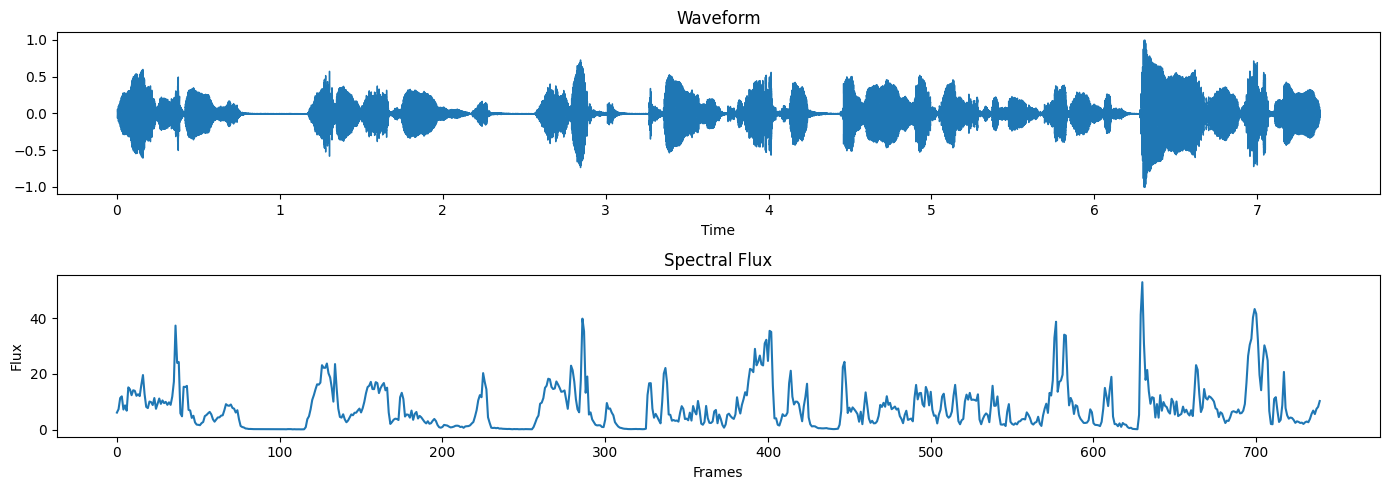

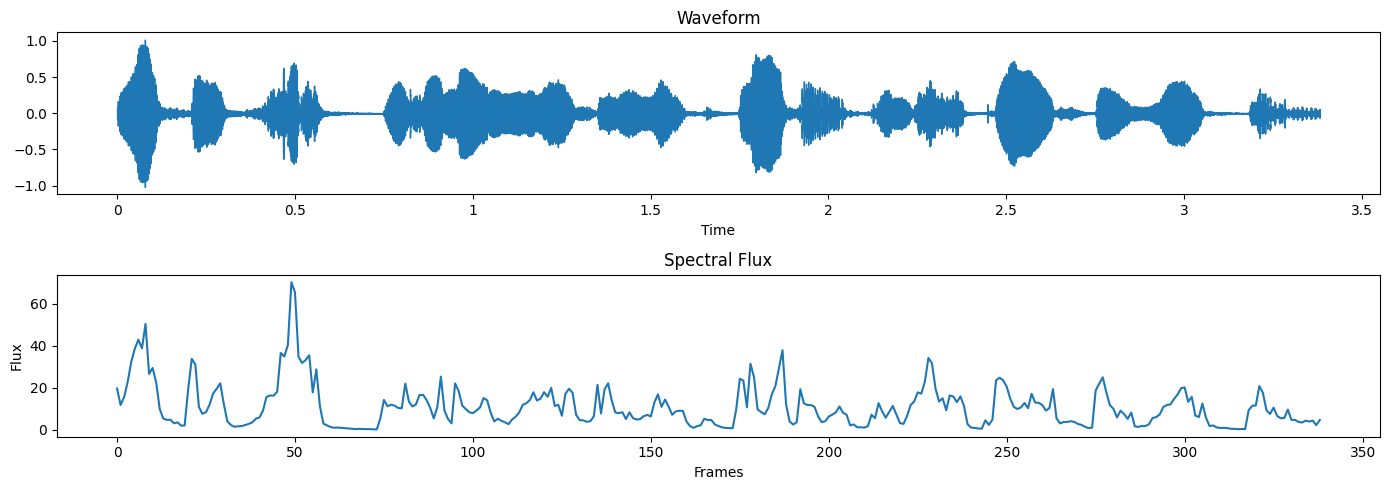

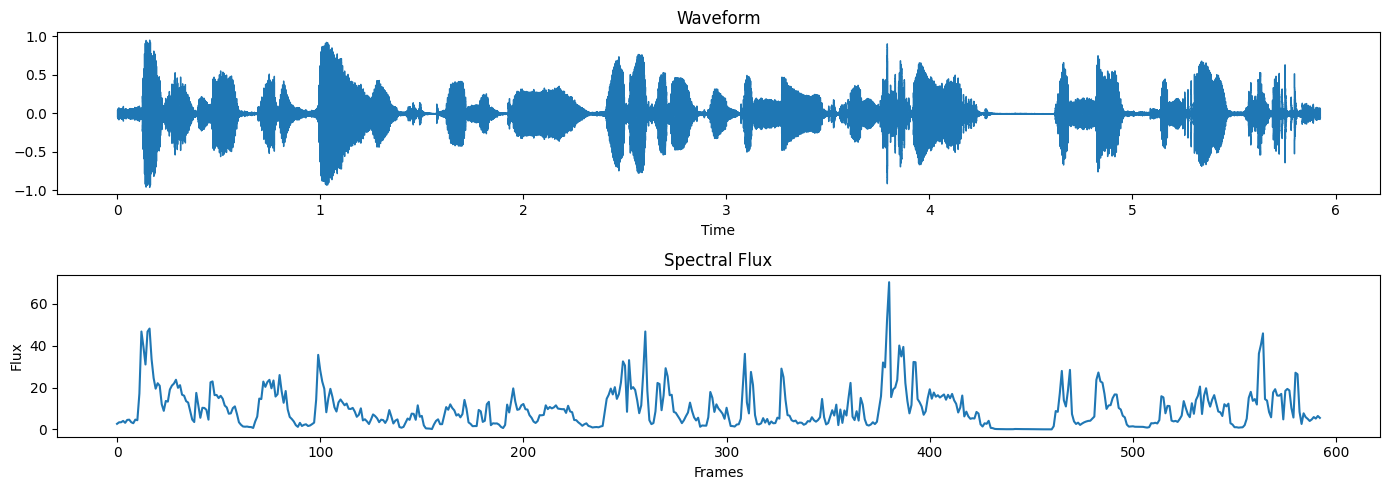

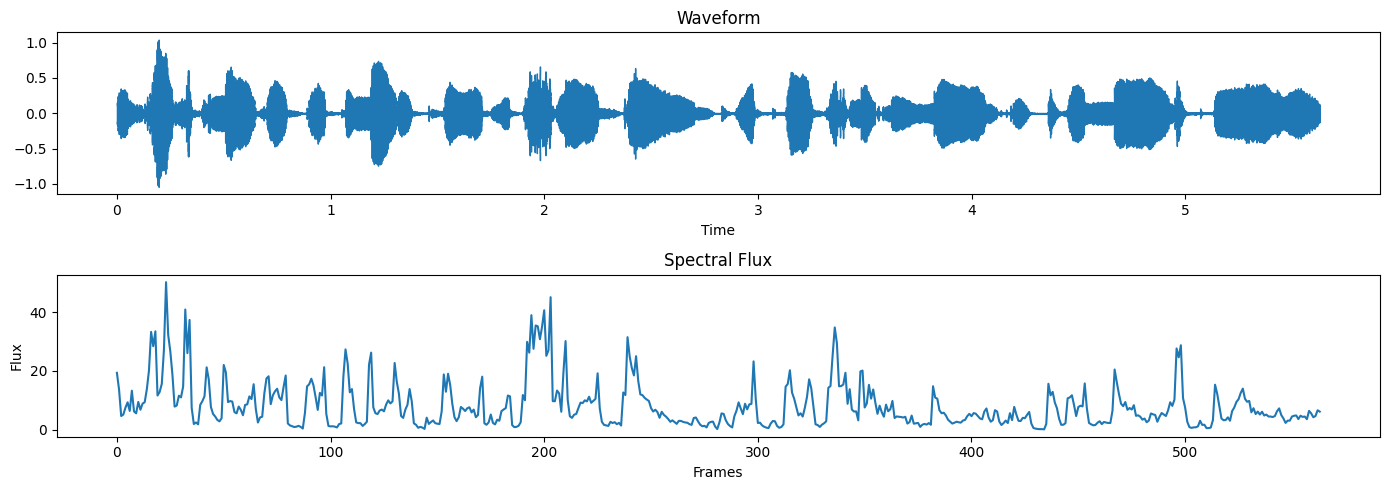

In [16]:
for index, row in train_sample_real_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)

    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # STFT 계산
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    # Spectral Flux 계산
    spectral_flux = np.sqrt(np.sum(np.diff(S, axis=1)**2, axis=0))

    # 시각화
    plt.figure(figsize=(14, 5))

    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')

    plt.subplot(2, 1, 2)
    plt.plot(spectral_flux)
    plt.title('Spectral Flux')
    plt.xlabel('Frames')
    plt.ylabel('Flux')

    plt.tight_layout()
    plt.show()

## train fake

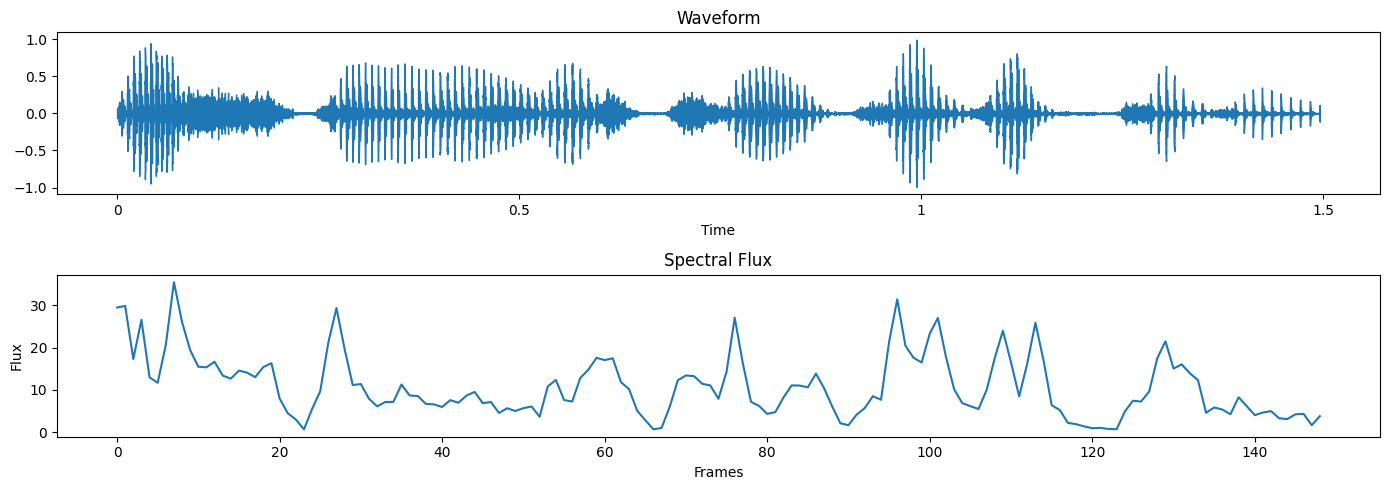

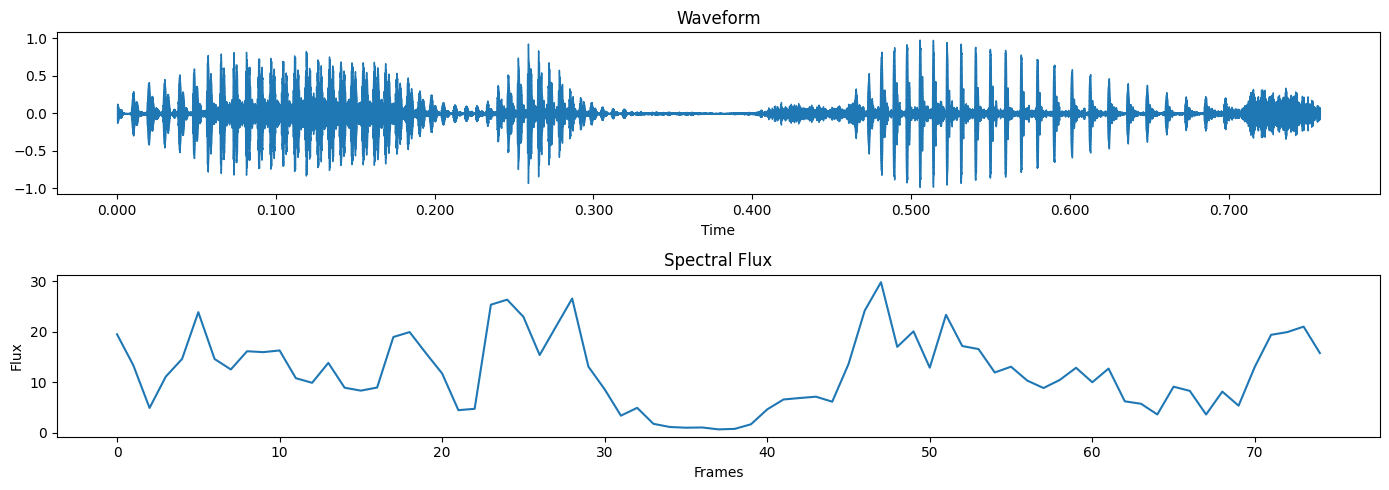

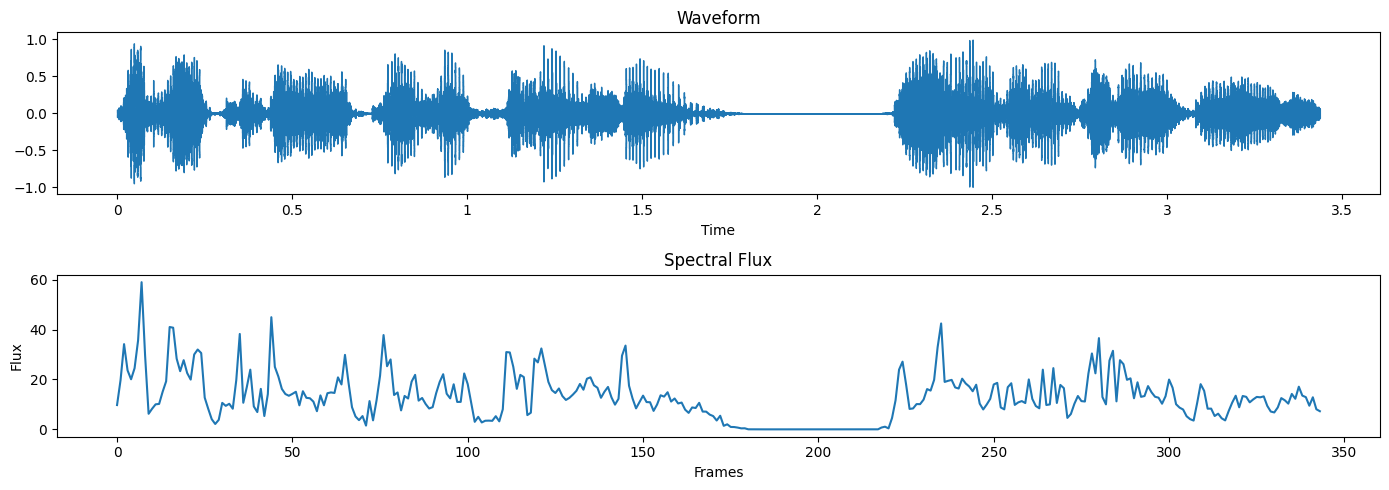

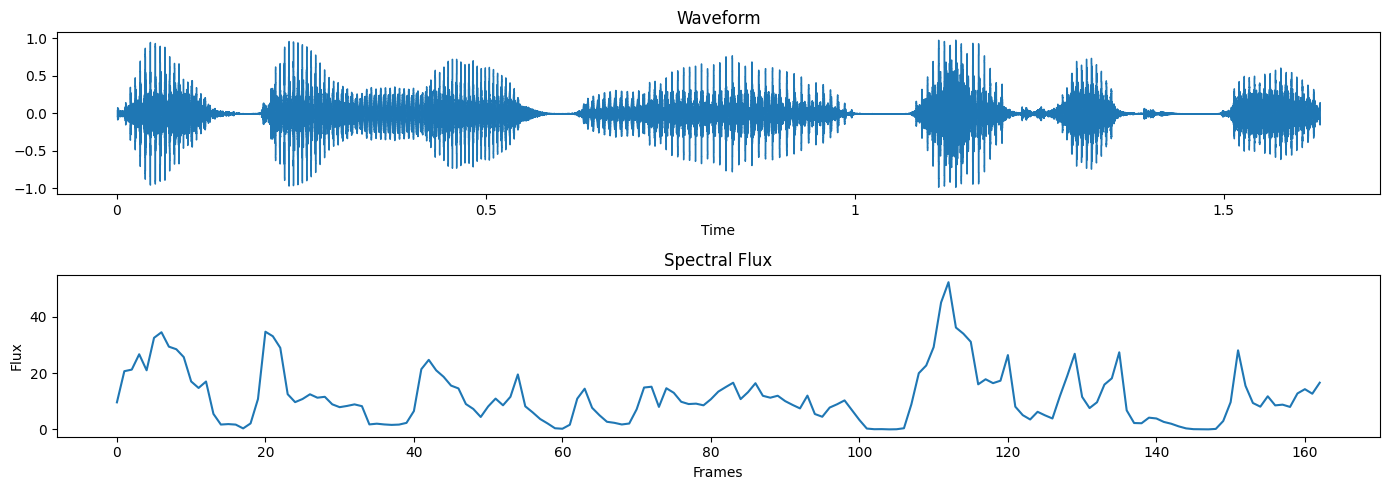

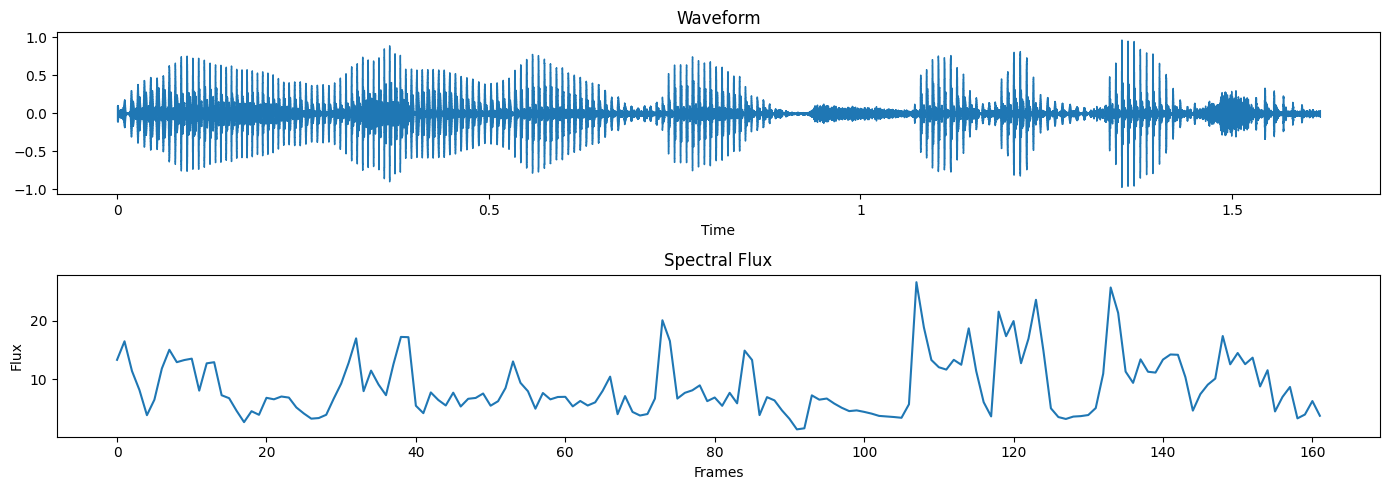

In [17]:
for index, row in train_sample_fake_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)
    
    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # STFT 계산
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    # Spectral Flux 계산
    spectral_flux = np.sqrt(np.sum(np.diff(S, axis=1)**2, axis=0))

    # 시각화
    plt.figure(figsize=(14, 5))

    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')

    plt.subplot(2, 1, 2)
    plt.plot(spectral_flux)
    plt.title('Spectral Flux')
    plt.xlabel('Frames')
    plt.ylabel('Flux')

    plt.tight_layout()
    plt.show()

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [44]:
# for index, row in test_sample_df.iterrows():
#     audio_file = row['path']
#     print(f"Playing audio file: {audio_file}")
#     display(Audio(audio_file))

()